In [1631]:
#importing requrired libraries and modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [1583]:
df=pd.read_csv("/home/neeraj/Downloads/quikr_car.csv")

In [1584]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [1585]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [1586]:
df.shape

(892, 6)

In [1587]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [1588]:
df['Price'].value_counts()

Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
1,30,000         12
                 ..
7,49,999          1
11,30,000         1
10,74,999         1
3,24,999          1
5,00,001          1
Name: Price, Length: 274, dtype: int64

In [1589]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [1590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [1632]:
#data preprocessing
df['Price']=df['Price'].replace('Ask For Price',0)

In [1592]:
df['Price']=df['Price'].str.replace(',','').fillna(0)

In [1593]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,0,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel


In [1594]:
df['Price']=df['Price'].astype(int)

In [1595]:
df=df[df['Price']!=0]

In [1596]:
mean=df['Price'].mean()
mean

404688.5344224037

In [1597]:
df['kms_driven'].value_counts()

45,000 kms      30
35,000 kms      29
55,000 kms      25
50,000 kms      23
20,000 kms      21
                ..
1,00,200 kms     1
65 kms           1
30,874 kms       1
1,03,553 kms     1
72,160 kms       1
Name: kms_driven, Length: 250, dtype: int64

In [1598]:
df['kms_driven']=df['kms_driven'].str.replace(',','')
df['kms_driven']=df['kms_driven'].str.replace('kms','')
df['kms_driven']=df['kms_driven'].fillna(0)
df=df[df['kms_driven']!='Petrol']
df['kms_driven']=df['kms_driven'].astype(int)

/tmp/ipykernel_7480/206668217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace(',','')
/tmp/ipykernel_7480/206668217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].str.replace('kms','')
/tmp/ipykernel_7480/206668217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [1599]:
df=df[df['year'].str.isnumeric()]

In [1600]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [1601]:
df=df[~df['fuel_type'].isna()]

In [1602]:
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [1603]:
df.reset_index(drop=True,inplace=True)

In [1604]:
unique=df['company'].unique()
unique

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [1605]:
df['company'].value_counts()

Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

In [1606]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [1633]:
#removing outliers
import seaborn as sns

<AxesSubplot:ylabel='Price'>

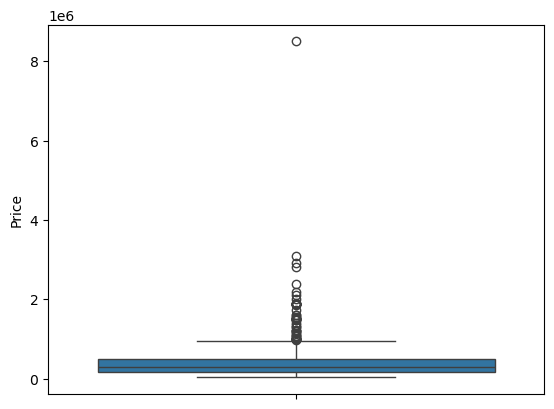

In [1608]:
sns.boxplot(df['Price'])

In [1609]:
sorted(df['Price'],reverse=True)

[8500003,
 3100000,
 2900000,
 2800000,
 2390000,
 2190000,
 2100000,
 2000000,
 1900000,
 1891111,
 1891111,
 1891111,
 1891111,
 1891111,
 1891111,
 1891111,
 1891111,
 1850000,
 1725000,
 1600000,
 1599000,
 1540000,
 1525000,
 1525000,
 1510000,
 1500000,
 1499000,
 1499000,
 1490000,
 1475000,
 1475000,
 1400000,
 1350000,
 1299000,
 1299000,
 1225000,
 1200000,
 1200000,
 1200000,
 1150000,
 1130000,
 1075000,
 1074999,
 1065000,
 1025000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 984999,
 970000,
 950000,
 950000,
 944999,
 940000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 900000,
 899000,
 895000,
 865000,
 865000,
 860000,
 855000,
 855000,
 855000,
 849999,
 830000,
 830000,
 830000,
 800000,
 800000,
 799999,
 795000,
 790000,
 770000,
 760000,
 750000,
 750000,
 750000,
 750000,
 750000,
 749999,
 730000,
 730000,
 725000,
 715000,
 701000,
 700000,
 699999,
 699000,
 699000,
 699000,
 699000,
 699000,
 699000,
 690000,
 690000,
 689

In [1610]:
df = df[~(df['Price']>=2800000) & (df['Price']<=8500003)]

<AxesSubplot:ylabel='kms_driven'>

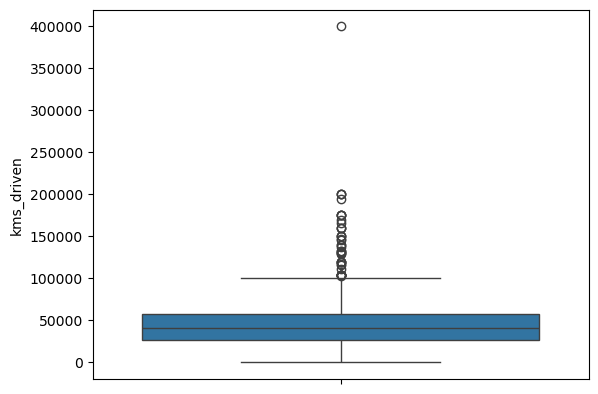

In [1611]:
sns.boxplot(df['kms_driven'])

In [1612]:
sorted(df['kms_driven'],reverse=True)

[400000,
 200000,
 200000,
 200000,
 195000,
 175430,
 175430,
 175430,
 175400,
 170000,
 166000,
 160000,
 160000,
 160000,
 150000,
 150000,
 150000,
 147000,
 146000,
 140000,
 140000,
 137495,
 133000,
 132000,
 131000,
 130000,
 130000,
 129000,
 120000,
 120000,
 120000,
 120000,
 117000,
 116000,
 111111,
 104000,
 104000,
 104000,
 104000,
 104000,
 104000,
 103553,
 102563,
 100800,
 100200,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 99000,
 99000,
 99000,
 97200,
 97200,
 97200,
 97200,
 97200,
 97000,
 97000,
 95500,
 95000,
 95000,
 95000,
 91200,
 90001,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 90000,
 88000,
 87000,
 85960,
 85455,
 85000,
 85000,
 82000,
 81876,
 80200,
 80200,
 80000,
 80000,
 80000,
 80000,
 80000,
 80000,
 80000,
 80000,
 77000,
 76000,
 75000,
 75000,
 75000,
 75000,
 75000,
 75000,
 75000,
 75000,
 75000,
 75000,
 74000,
 73000,
 73000,
 72160,
 72000,
 72000,
 72000,
 72000,
 71200,
 70000,
 70000,
 70000,
 70000,
 700

In [1613]:
df = df[~(df['kms_driven']>=195000) & (df['kms_driven']<=400000)]

In [1634]:
#seperating dependent and independent variables
x=df.drop(['Price'],axis=1)
y=df['Price']

In [1615]:
print(x)

                       name   company  year  kms_driven fuel_type
0       Hyundai Santro Xing   Hyundai  2007       45000    Petrol
1       Mahindra Jeep CL550  Mahindra  2006          40    Diesel
2         Hyundai Grand i10   Hyundai  2014       28000    Petrol
3    Ford EcoSport Titanium      Ford  2014       36000    Diesel
4                 Ford Figo      Ford  2012       41000    Diesel
..                      ...       ...   ...         ...       ...
811      Maruti Suzuki Ritz    Maruti  2011       50000    Petrol
812          Tata Indica V2      Tata  2009       30000    Diesel
813    Toyota Corolla Altis    Toyota  2009      132000    Petrol
814            Tata Zest XM      Tata  2018       27000    Diesel
815      Mahindra Quanto C8  Mahindra  2013       40000    Diesel

[807 rows x 5 columns]


In [1616]:
print(y)

0       80000
1      425000
2      325000
3      575000
4      175000
        ...  
811    270000
812    110000
813    300000
814    260000
815    390000
Name: Price, Length: 807, dtype: int64


In [1]:
#encoding the categorical data
ohe=OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

NameError: name 'OneHotEncoder' is not defined

In [1636]:
#transforming columns
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [1619]:
#checking for the best random_state value which gives higher accuracy
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    xg=XGBRegressor()
    pipe=make_pipeline(column_trans,xg)
    pipe.fit(x_train,y_train)
    pred=pipe.predict(x_test)
    scores.append(metrics.r2_score(y_test,pred))

In [1620]:
np.argmax(scores)

817

In [1621]:
scores[np.argmax(scores)]

0.912582066377266

In [1622]:
#using the best random_state which was found on upper cell
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
xg=XGBRegressor()
pipe=make_pipeline(column_trans,xg)
pipe.fit(x_train,y_train)
pred=pipe.predict(x_test)

In [1623]:
print(f"Accuracy score: {metrics.r2_score(y_test,pred)}")

Accuracy score: 0.912582066377266


In [1624]:
#importing joblib library to save the model
import joblib

In [1625]:
joblib.dump(pipe,'car_price_predictor')

['car_price_predictor']

In [1626]:
model = joblib.load('car_price_predictor')

In [1638]:
#new dataframe having specs of car to predict the price of the car
data_new=pd.DataFrame({
    'name':['Audi A8','Honda City'],
    'company':['Audi','Honda'],
    'year':[2017,2014],
    'kms_driven':[4000,45000],
    'fuel_type':['Petrol','Diesel']
})

In [1628]:
data_new

,name,company,year,kms_driven,fuel_type
0,Audi A8,Audi,2017,4000,Petrol
1,Honda City,Honda,2014,45000,Diesel


In [1639]:
#predicting the price of the cars
price1 = model.predict(data_new.loc[[0]])
price2 = model.predict(data_new.loc[[1]])

In [1630]:
print(f"The price of the \'{data_new.loc[0,'name']}\' car is {price1[0]}/-")
print(f"The price of the \'{data_new.loc[1,'name']}\' car is {price2[0]}/-")

The price of the 'Audi A8' car is 1055726.25/-
The price of the 'Honda City' car is 535097.125/-
